## Analyzing the Stroop Effect

In this report, we analyze the Stroop effect. 
Each participant says loudly the color of words and time is measured for it. 
This experiment is carried out for two types of words: (1) congruent words (i.e. 
a color of a word matches with what the word represents. For example, a word "green" 
in green color.) (2) incongruent words (i.e. a color of a word is different from 
what the word represents. For example, a word "green" in red color.) 
For each participant, time is measured for saying the colors of each type of words. 
The result of the experiment (for 24 participants) is summarized in `stroopdata.csv`. 
In the following, we will analyze if time for saying the colors of the congruent words 
is significantly different from time for saying the colors of the incongruent ones. 


(1) What is the independent variable? What is the dependent variable?

- **Independent variable**: Type of words (either congruent or incongruent). <br>

- **Dependent variable**: Time for saying colors of words.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

-  ** A set of hypotheses**: Let us denote by $\mu_{cong}$ (resp. $\mu_{incong}$) the population mean time for 
saying the colors of the congruent (resp. incongruent) words. Then a set of hypotheses to be considered here are as follows: 
    - *Null hypothesis*:  $\mu_{cong} = \mu_{incong}$ (i.e. the population mean time for saying the colors of the congruent words is the same as the population mean time for saying the colors of the incongruent words.)
    - *Alternate hypothesis*:  $\mu_{cong} \neq \mu_{incong}$ (i.e. the population mean time for saying the colors of the congruent words is different from the population mean time for saying the colors of the incongruent words.)


- ** Statistical test **: 
Two-tailed paired t-test for mean. <br>

- ** Justification for the choice **: 
    - Since we do not know mean and standard deviation of the population, we consider the 
    t-test. 
    - Since time for saying the color of the congruent words and the time for the incongruent ones
    are mesured for each participant, we consider the paired t-test.
    - Here we take the two-tailed test for simplicity. In case when the null hypothesis 
    is rejected, we will judge whether $\mu_{cong} > \mu_{incong}$ or $\mu_{cong} < \mu_{incong}$
    is correct, based on the value of the t-statistics (see below for the detail).
    - Here we assumed that each participant in the dataset is independent. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [233]:
import pandas as pd

# read the data from the csv file
df = pd.read_csv("stroopdata.csv") 

# number of samples
num_samp = df.shape[0]
print("number of samples:", num_samp)

# mean time and standard deviation for naming congruent/incongruent words
mean_cong = df["Congruent"].mean()
mean_incong = df["Incongruent"].mean()
std_cong = df["Congruent"].std(ddof=1)
std_incong = df["Incongruent"].std(ddof=1)
print("mean valuefor congruent words:", mean_cong)
print("mean value for incongruent words:", mean_incong)
print("standard deviation for congruent words:", std_cong)
print("standard deviation for incongruent words:", std_incong)

number of samples: 24
mean valuefor congruent words: 14.051125000000004
mean value for incongruent words: 22.01591666666667
standard deviation for congruent words: 3.559357957645195
standard deviation for incongruent words: 4.797057122469138


- ** Number of samples **: 24 <br>
- ** Sample mean time for saying colors of congruent words **: 14.05 <br>
- ** Sample mean time for saying colors of incongruent words**: 22.02 <br>
- ** Sample standard deviation for congruent words**: 3.559 <br>
- ** Sample standard deviation for incongruent words**: 4.797

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

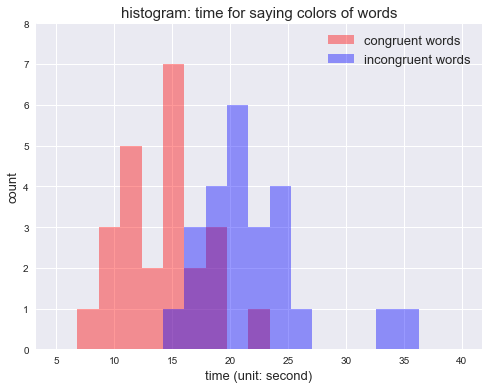

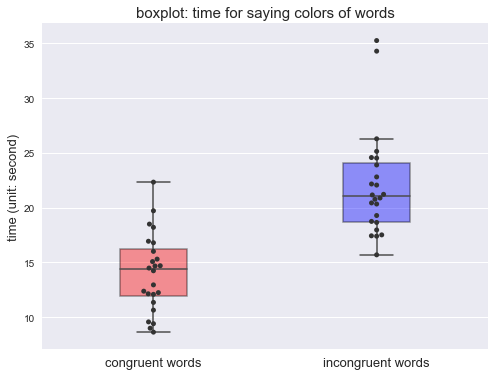

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns


## for histogram
fig1 = plt.figure(figsize=(8,6))
# plot histogram
bin = np.linspace(5,40, 20)
plt.hist(df["Congruent"], bin, alpha=0.4, 
             label='congruent words', color="red")
plt.hist(df["Incongruent"], bin, alpha=0.4, 
             label='incongruent words', color ="blue")
# aesthetic improvement
plt.ylim(ymin=0, ymax=8)
plt.xlabel("time (unit: second)" , fontsize=13)
plt.ylabel("count", fontsize=13)
plt.title("histogram: time for saying colors of words" , fontsize=15)
plt.legend(loc='upper right', fontsize=13)
plt.show()

## for boxplot
fig2 = plt.figure(figsize=(8,6))
# plot boxes and data points
ax1  = sns.boxplot(data = df, fliersize=0, width=0.3, linewidth=1.5)
ax2 = sns.swarmplot(data=df, color="0.2", size = 5)
# change colors of the boxes
box_con = ax1.artists[0]
box_incon = ax1.artists[1]
plt.setp(ax1.artists, alpha=0.4)
box_con.set_facecolor('red')
box_con.set_edgecolor('black')
box_incon.set_facecolor('blue')
box_incon.set_edgecolor('black')
# aesthetic improvement
plt.xticks([0, 1], ["congruent words", "incongruent words"], fontsize=13)
plt.ylabel("time (unit: second)", fontsize=13)
plt.title("boxplot: time for saying colors of words", fontsize=15)
plt.show()

** Observation **: 
Judging from the above histogram and boxplot, to say the colors of the incongruent words seems to take longer time than to say the colors of the congruent ones. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [232]:
import scipy.stats as stats

# paired t-test 
stats.ttest_rel(df["Congruent"], df["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

- **Confidence level and critical statistic value**: We note that, for 95% confidence level with 23 degrees of freedom, the critical statistic values for the two-tailed t-test are -2.069 and 2.069. 
(See for example http://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm)
- **Result of statistical test**: p-value is $4.103\times 10^{-8} \ll 0.05$. Therefore, 
the null hypothesis "$\mu_{cong} = \mu_{incong}$" is rejected. We also note 
that t-statistics (= -8.021) belongs to the lower tail, below the critical value -2.069. This means that $\mu_{cong}$ is smaller than $\mu_{incong}$. <br>
- ** Conclusion **: * **It take more time to say the colors of the incongruent words than to say the colors of the congruent ones** *. This conclusion matches with our expectation from some 
descriptive statistics and plots above. 
<br>
<br>
- ** Hypothesis for the reason of the observed effect **: One explanation is that we first reconginze the meaning of words and then the color of the words. Thus in order to say
the colors of the incongruent words, we need to overwrite our memory (where the meanings of the words are stored first) to correctly say the colors of the words. 
- ** Related experiment for Stoop effect**: Each participant sees photos of animals and 
listens to the sounds of the animials at the same time. The participant is asked to say the names 
of the animals which make the sounds (not the ones in the photo). In the first experiment, 
the photo and sound are from an identical animal (e.g. a photo of a dog and "bow wow" sound). 
In the second experiment, the photo and sound do not match (e.g. a photo of a cat and "bow wow" sound). Then the time difference for saying the names of the animals in these 
two cases is measured. 
